# Feature Scaling and Learning Rate

## Learning Rate

In our current linear regression model, we have a feature called 'size' that represents the area in square meters (m²). Since the range of this feature can vary significantly compared to other features, it can negatively impact the performance of our model. Larger feature values like size in m² may dominate smaller ones, leading to an unbalanced gradient descent update during training. This raises the question: How can we normalize this feature to ensure that all features contribute equally and that the learning process becomes more efficient and accurate?

### 1. import the libraries :

In [4]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

### 2. importing the data from a txt file:


In [5]:
def load_data():
    data = np.loadtxt(r'C:\Users\hp\Documents\Apprentissage Automatique\houses.txt', delimiter=',', skiprows=1) #skiprows : to skip the first row !
    X = data[:, : 4]
    Y = data[:, 4]
    return X, Y

# Call the function :
X_train, Y_train = load_data()

In [6]:
# define the features :
X_features = ['size(sqft)','bedrooms','floors','age']

### 3. ploting the relationship between each feature and price

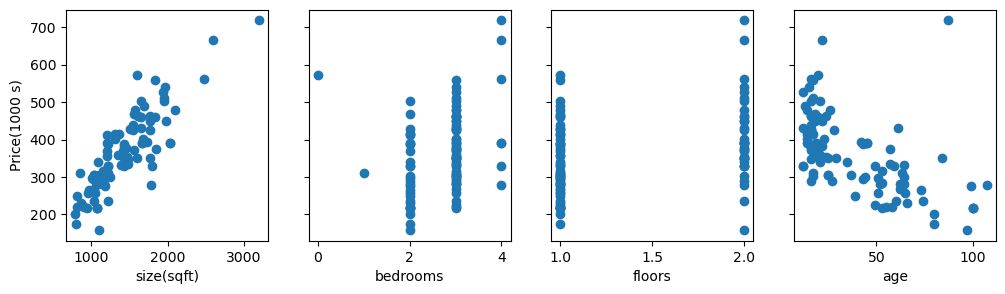

In [7]:
figure, axe = plt.subplots(1, 4, figsize = (12, 3), sharey=True)
for i in range(len(axe)):
    axe[i].scatter(X_train[:,i], Y_train)
    axe[i].set_xlabel(X_features[i])

axe[0].set_ylabel('Price(1000 s)')
plt.show()
    


#### Analysing this :

- In the first plot, we have presented the size by price: in the graph, there is a good relationship between the price and the size. As the size starts to increase, the price also starts to increase automatically!
- For the number of bedrooms, there seems to be no relationship between them, so this feature doesn't have an impact on the price!
- The same thing applies to the number of floors.
- The age has a significant impact on the price. If the age is small, the price tends to be high!

### 4. implementing the functions:

so we have to create 3 function or import it in the last notebook 
- cost_funtion
- compute_gradient
- gradient_descent

In [8]:
# the cost fucntion
def cost_function(X, Y, W, b):
    '''
    X: the data without the target varaible
    Y: the target varaible
    W: the prameter (vector !)
    b: the second parameter 
    return: the cost !
    '''
    n = X.shape[0]
    m = X.shape[1]
    cost = 0
    for i in range(n):
        cost += ((X[i].dot(W) + b) - Y[i]) ** 2

    cost *= (1/(2*n))
    return cost

In [9]:
# the compute gradient :
def compute_gradient(X, Y, W, b):
    '''
    X : the data without target variable
    Y : the data related to the target varaible
    W : the first vector parameter
    b : the second parameter 
    return :
           a list that conteint the partial DR
    '''
    n = X.shape[0]
    m = X.shape[1]
    dj_w = np.zeros((m,))
    dj_b = 0

    for i in range(n):
        for j in range(m):
            dj_w[j] += (1/ n) * (((X[i].dot(W) + b) - Y[i]) * X[i][j])
        dj_b += (1/n) * ((X[i].dot(W) + b) - Y[i])

    return dj_w, dj_b

In [10]:
# the gradoent descente :
def gradient_descent(X, Y, w_in, b_in, alpha, num_iter, compute_gradient, cost_function):
    '''
    X: the data without target varaible
    Y: the data related to the target varaible
    w_in : the first parameter initialisation
    b_in : the seconde parameter initialisation
    alpha : the rate learning 
    num_iter : the number of itertions in the algo
    compute_gradient : the function that calculate the partial derivations
    const_function : the function that calculate the cost of each parameters
    return :
            the best parameters that optimazing the cost function (the same thing of one variable !!)
    '''
    n = X.shape[0]
    m = X.shape[1]
    hist = {}
    hist["cost"] = [];
    hist["params"] = [];
    hist["grads"] = [];
    hist["iter"] = [];
    w = copy.deepcopy(w_in)
    b = b_in

    save_interval = np.ceil(num_iter/ 10000)
    print( f"Iteration Cost          w0        w1      w2       w3        b     djdw0     djdw1    djdw2    djdw3    djdb ")
    print(f"---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|")

    for i in range(num_iter):
        dj_w, dj_b = compute_gradient(X, Y, w, b)

        w = w - alpha * (dj_w)
        b = b - alpha * (dj_b)

        if i == 0 or i % save_interval == 0:
            hist["cost"].append(cost_function(X, Y, w, b))
            hist["params"].append([w, b])
            hist["grads"].append([dj_w, dj_b])
            hist["iter"].append(i)


        if i % (math.ceil(num_iter / 10)) == 0 :
            cst = cost_function(X, Y, w, b)
            print(f"{i:9d} {cst:0.5e} {w[0]: 0.1e} {w[1]: 0.1e} {w[2]:0.1e} {w[3]: 0.1e} {b: 0.1e} {dj_w[0]: 0.1e} {dj_w[1]: 0.1e} {dj_w[2]:0.1e} {dj_w[3]: 0.1e} {dj_b: 0.1e}")

    return w, b, hist

#### adding the function that run the gradient descent :

In [11]:
def run_descent(X, Y, iter = 1000, alpha=1e-6):
    n, m = X.shape
    w_in = np.zeros(m)
    b_in = 0
    w_out, b_out, hist_out = gradient_descent(X, Y, w_in, b_in, alpha, iter, compute_gradient, cost_function)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.2f}")
    return (w_out, b_out, hist_out)

### Test the learning rates :


In [15]:
# if alpha = 9.9e-7
w_out, b_out, histo_out = run_descent(X_train, Y_train, 10, alpha=9.9e-7)


Iteration Cost          w0        w1      w2       w3        b     djdw0     djdw1    djdw2    djdw3    djdb 
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.55884e+04  5.5e-01  1.0e-03 5.1e-04  1.2e-02  3.6e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 1.28213e+05 -8.8e-02 -1.7e-04 -1.0e-04 -3.4e-03 -4.8e-05  6.4e+05  1.2e+03 6.2e+02  1.6e+04  4.1e+02
        2 1.72159e+05  6.5e-01  1.2e-03 5.9e-04  1.3e-02  4.3e-04 -7.4e+05 -1.4e+03 -7.0e+02 -1.7e+04 -4.9e+02
        3 2.31358e+05 -2.1e-01 -4.0e-04 -2.3e-04 -7.5e-03 -1.2e-04  8.6e+05  1.6e+03 8.3e+02  2.1e+04  5.6e+02
        4 3.11100e+05  7.9e-01  1.4e-03 7.1e-04  1.5e-02  5.3e-04 -1.0e+06 -1.8e+03 -9.5e+02 -2.3e+04 -6.6e+02
        5 4.18517e+05 -3.7e-01 -7.1e-04 -4.0e-04 -1.3e-02 -2.1e-04  1.2e+06  2.1e+03 1.1e+03  2.8e+04  7.5e+02
        6 5.63212e+05  9.7e-01  1.7e-03 8.7e-04  1.8e-02  6.6e-04 -1.3e+06 -2.5e+03 -1.3e+03 -3.1e+04 -8.8e+02


### Note

the cost is increase !!!!!!!!!! so the learnig rate is too much !!!! so we will try to decrease it !!

In [16]:
# if alpha = 9e-7
w_out, b_out, histo_out = run_descent(X_train, Y_train, 10, alpha=9e-7)

Iteration Cost          w0        w1      w2       w3        b     djdw0     djdw1    djdw2    djdw3    djdb 
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.64616e+04  5.0e-01  9.1e-04 4.7e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 6.18990e+04  1.8e-02  2.1e-05 2.0e-06 -7.9e-04  1.9e-05  5.3e+05  9.8e+02 5.2e+02  1.3e+04  3.4e+02
        2 5.76572e+04  4.8e-01  8.6e-04 4.4e-04  9.5e-03  3.2e-04 -5.1e+05 -9.3e+02 -4.8e+02 -1.1e+04 -3.4e+02
        3 5.37137e+04  3.4e-02  3.9e-05 2.8e-06 -1.6e-03  3.8e-05  4.9e+05  9.1e+02 4.8e+02  1.2e+04  3.2e+02
        4 5.00474e+04  4.6e-01  8.2e-04 4.1e-04  8.0e-03  3.2e-04 -4.8e+05 -8.7e+02 -4.5e+02 -1.1e+04 -3.1e+02
        5 4.66388e+04  5.0e-02  5.6e-05 2.5e-06 -2.4e-03  5.6e-05  4.6e+05  8.5e+02 4.5e+02  1.2e+04  2.9e+02
        6 4.34700e+04  4.5e-01  7.8e-04 3.8e-04  6.4e-03  3.2e-04 -4.4e+05 -8.1e+02 -4.2e+02 -9.8e+03 -2.9e+02
   

so the learning rate decresed => the cost function conv


In [17]:
# if alpha = 1e-7
w_out, b_out, histo_out = run_descent(X_train, Y_train, 10, alpha=1e-7)

Iteration Cost          w0        w1      w2       w3        b     djdw0     djdw1    djdw2    djdw3    djdb 
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.42313e+04  5.5e-02  1.0e-04 5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 2.76461e+04  9.8e-02  1.8e-04 9.2e-05  2.2e-03  6.5e-05 -4.3e+05 -7.9e+02 -4.0e+02 -9.5e+03 -2.8e+02
        2 1.75102e+04  1.3e-01  2.4e-04 1.2e-04  2.9e-03  8.7e-05 -3.4e+05 -6.1e+02 -3.1e+02 -7.3e+03 -2.2e+02
        3 1.13157e+04  1.6e-01  2.9e-04 1.5e-04  3.5e-03  1.0e-04 -2.6e+05 -4.8e+02 -2.4e+02 -5.6e+03 -1.8e+02
        4 7.53002e+03  1.8e-01  3.3e-04 1.7e-04  3.9e-03  1.2e-04 -2.1e+05 -3.7e+02 -1.9e+02 -4.2e+03 -1.4e+02
        5 5.21639e+03  2.0e-01  3.5e-04 1.8e-04  4.2e-03  1.3e-04 -1.6e+05 -2.9e+02 -1.5e+02 -3.1e+03 -1.1e+02
        6 3.80242e+03  2.1e-01  3.8e-04 1.9e-04  4.5e-03  1.4e-04 -1.3e+05 -2.2e+02 -1.1e+02 -2.3e+03 -8.6e+01


## Feature Scaling

Feature scaling is a method that reduces or normalizes the features. The advantage of this method is that it reduces the time the cost function takes to find the best parameters, or in other terms, to find the global minimum!

we have 3 methods (the best !):
- normalize by the divided with the maximum values but this type is more efficient if we have the positif integers !!
- the second ones is normalize by the mean of the feaures , is efficient of all the types of parameters (int, float , pos, neg, ...) 
          Xnorm = (X_no - mean ) / (max - min)
- the last normalize is the mean and the st-devivation (segma)  Z_score normalisation !
          Xnorm = (X_no - mean ) / (segma)



if we use the z_score normalisation, all values have the mean = 0 and segma = 1 (the normal law)

### Implementing the Z_score normalisation :

In [18]:
def Z_score_normalisation (X):
    '''
    the features that you will nromalise
    return :
          the normalized feature 
    '''
    meaN = np.mean(X, axis=0)
    segma = np.std(X, axis=0)
    X_norm = (X - meaN) / segma
    return X_norm, meaN, segma

### Testing the steps to normalised a feature :

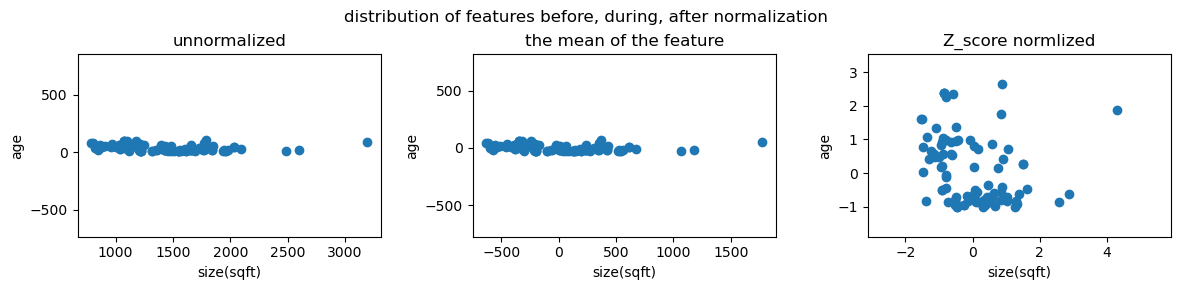

In [19]:
mu = np.mean(X_train, axis= 0)
segma = np.std(X_train, axis=0)
mean = (X_train - mu)
nemalized = mean / segma

figure, axe = plt.subplots(1, 3, figsize = (12, 3))

axe[0].scatter(X_train[:, 0], X_train[:, 3])
axe[0].set_xlabel(X_features[0])
axe[0].set_ylabel(X_features[3])
axe[0].set_title('unnormalized')
axe[0].axis('equal')

axe[1].scatter(mean[:, 0], mean[:, 3])
axe[1].set_xlabel(X_features[0])
axe[1].set_ylabel(X_features[3])
axe[1].set_title('the mean of the feature')
axe[1].axis('equal')

axe[2].scatter(nemalized[:, 0], nemalized[:, 3])
axe[2].set_xlabel(X_features[0])
axe[2].set_ylabel(X_features[3])
axe[2].set_title('Z_score normlized')
axe[2].axis('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
figure.suptitle("distribution of features before, during, after normalization")
plt.show()

### compare the features after and before z_score normalisation !

In [20]:
# the function of plotting
from scipy.stats import norm
def norm_plot(ax, data):
    scale = (np.max(data) - np.min(data)) * 0.2
    x = np.linspace(np.min(data) - scale, np.max(data) + scale, 50)
    _, bins, _ = ax.hist(data, x, color="xkcd:azure")
    # ax.set_ylabel("Count")
    mu = np.mean(data);
    std = np.std(data);
    dist = norm.pdf(bins, loc=mu, scale=std)
    axr = ax.twinx()
    axr.plot(bins, dist, color="orangered", lw=2)
    axr.set_ylim(bottom=0)
    axr.axis('off')

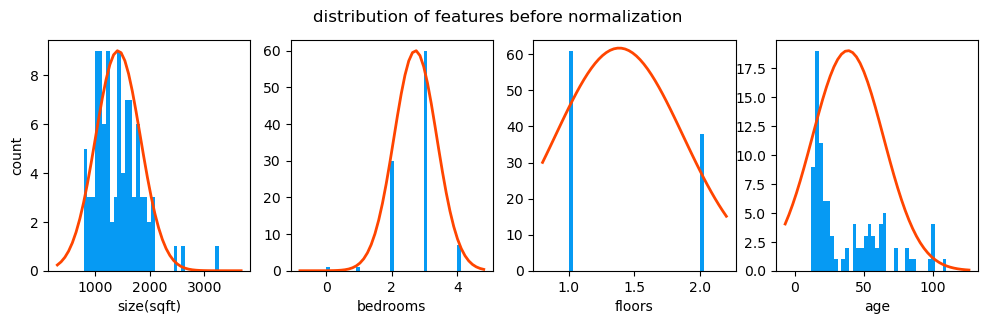

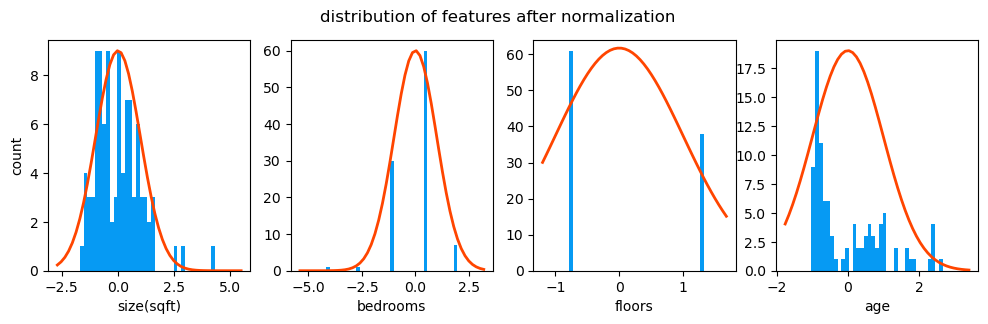

In [21]:
X_normalized, X_mean, X_segma = Z_score_normalisation(X_train)


figure,axe = plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(axe)):
    norm_plot(axe[i],X_train[:,i],)
    axe[i].set_xlabel(X_features[i])
axe[0].set_ylabel("count");
figure.suptitle("distribution of features before normalization")
plt.show()

figure,axe=plt.subplots(1,4,figsize=(12,3))
for i in range(len(axe)):
    norm_plot(axe[i],X_normalized[:,i],)
    axe[i].set_xlabel(X_features[i])
axe[0].set_ylabel("count");
figure.suptitle("distribution of features after normalization")
plt.show()

In [22]:
## Now we will diplay the algorithm of gradient descent after z score normalisation :
w_norm, b_norm, hist = run_descent(X_normalized, Y_train, 1000, 1.0e-1,)

Iteration Cost          w0        w1      w2       w3        b     djdw0     djdw1    djdw2    djdw3    djdb 
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00 3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21086e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.2e-01  4.5e-01 5.3e-01 -1.7e-01 -9.6e-03
      200 2.19209e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.0e-02  1.5e-02 1.7e-02 -6.0e-03 -2.6e-07
      300 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.0e-03  5.1e-04 5.7e-04 -2.0e-04 -6.9e-12
      400 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.4e-05  1.7e-05 1.9e-05 -6.6e-06 -2.7e-13
      500 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-06  5.6e-07 6.2e-07 -2.2e-07 -2.7e-13
      600 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.7e-08  1.9e-08 2.1e-08 -7.3e-09 -2.6e-13


In [ ]:
### we have the parameters too small after normalisation  !!

### NOTE : if the features are normalized the learning rate 1.0e-1  is the good one to start with in the linear regression !

#### now we will display the relations or errors between the predict varaibles and the target varaibles


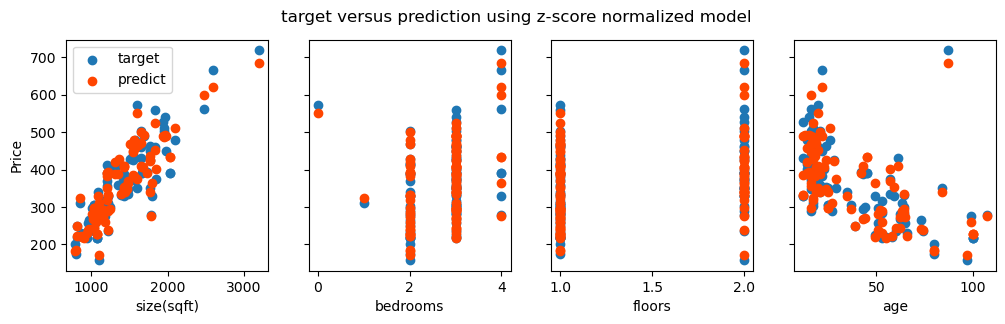

In [23]:
n = X_normalized.shape[0]
Y_predict = np.zeros(n)
for i in range(n):
    Y_predict[i] = np.dot(X_normalized[i], w_norm) + b_norm


# plot the result :
figure,axe = plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(axe)):
    axe[i].scatter(X_train[:,i],Y_train, label = 'target')
    axe[i].set_xlabel(X_features[i])
    axe[i].scatter(X_train[:,i],Y_predict,color="orangered", label = 'predict')
axe[0].set_ylabel("Price")
axe[0].legend()
figure.suptitle("target versus prediction using z-score normalized model")
plt.show()

The results are similary good!

### Some prediction (the data is not in the X_train !!!)

In [25]:
# First, normalize our example.
x_house = np.array([1200, 3, 1, 40])
X_mu = np.mean(x_house)
X_sigma = np.std(x_house)
x_house_normalized = (x_house - X_mu) / X_sigma
print(x_house_normalized)
x_house_predict = np.dot(x_house_normalized, w_norm) + b_norm
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.0f}")

[ 1.73125855 -0.59980611 -0.60370096 -0.52775148]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $607105


## ==> Normalization is essential for achieving the best predictions in your model.